## **Perceptron Class**

$y = 1, if \sum_i w_i x_i >= b$

$y = 0, otherwise$

In [104]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [105]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
data = pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names)
data['class'] = breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [106]:
from sklearn.model_selection import train_test_split
X = data.drop('class', axis= 1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, stratify=y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape)

(455, 30) (114, 30) (455,)


In [107]:
from sklearn.metrics import accuracy_score

In [108]:
class Perceptron:

    def __init__(self) -> None:
        self.b = None
        self.w = None

    def model(self, X):
         return 1 if (np.dot(self.w, X) >= self.b) else 0
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)

        return Y
    

    def fit(self, X, Y, epochs = 1, learning_rate = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0

        accuracy = {}
        max_accuracy = 0

        wt_matrix = []

        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + learning_rate * x 
                    self.b = self.b + learning_rate * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - learning_rate * x 
                    self.b = self.b - learning_rate * 1


            wt_matrix.append(self.w)

            accuracy[i] = accuracy_score(self.predict(X), Y)
            if accuracy[i] > max_accuracy:
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b

        self.w = chkptw
        self.b = chkptb

        print(max_accuracy)
        plt.plot(accuracy.values())
        plt.show()

        return np.array(wt_matrix)

In [109]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

0.9186813186813186


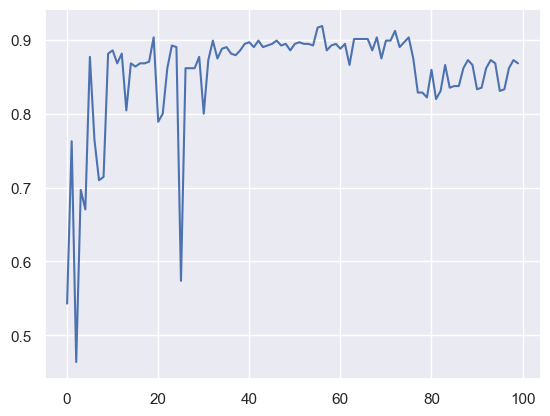

In [110]:
perceptron = Perceptron()
wt_matrix = perceptron.fit(X_train, y_train, 100, 0.001);

In [111]:
from sklearn.metrics import accuracy_score

y_pred_train = perceptron.predict(X_train)
print(accuracy_score(y_pred_train, y_train))

0.9186813186813186


In [112]:
y_pred_test = perceptron.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.9210526315789473
